In [14]:
import numpy
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.utils.data.dataloader

# Definindo a conversão de imagem para tensor
transform = transforms.ToTensor()

# Carrega a parte de treino do dataset
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainload = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Carrega a parte de validação
valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


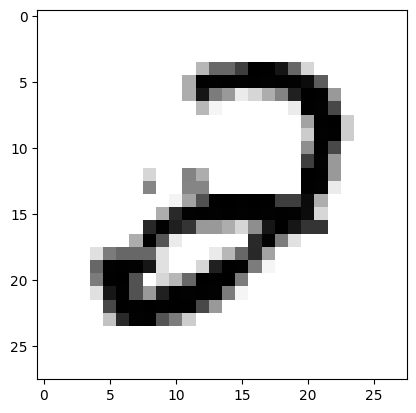

In [23]:
dataiter = iter(trainload)
imagens, etiquetas = next(dataiter)

plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r')

In [24]:
print(imagens[0].shape) # Verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) # Para verificar as dimensões do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [25]:
# Criando minha rede neural

class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28*28,128) # Camada de entrada, 784 neurônios que se ligan a 128
        self.linear2 = nn.Linear(128, 64) # Camada interna 1, 128 neurônios que se ligam a 64
        self.linear3 = nn.Linear(64,10) # Camada interna 2, 64 neurônios que se ligam a 10

    # Função de ativação de camada
    def forward(self, X):
        X = F.relu(self.linear1(X)) 
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)

In [26]:
# Otimizar a rede

def treino(modelo, trainloader, device):

    otimizador = optim.SGD(modelo.parameters(), lr= 0.1, momentum=0.5) # Define a pltc de atualização de pesos e das bias
    inicio = time()

    criterio = nn.NLLLoss() # Definindo o critério para calcular a perda
    EPOCHS = 10 # Número de epochs que o algoritmo rodará
    modelo.train()

    for epoch in range(EPOCHS):
        perda_acumulada = 0 

        for imagens, etiquetas in trainloader:

            imagens = imagens.view(imagens.shape[0], -1) # Convertendo as imagens para vetores de 28*28
            otimizador.zero_grad() # Zerando os gradientes por conta do ciclo anterior

            output = modelo(imagens.to(device))
            perda_instantanea = criterio(output, etiquetas.to(device)) # Calculando a perda da epoch em questão

            perda_instantanea.backward() # Back propagation a partir da perda

            otimizador.step()  # Atualizando o pesos e as bias

            perda_acumulada += perda_instantanea.item() # Atualizando a perda acumulada 
    else:
        print("Eposh {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
    print("\n Tempo de Treino (em minutos) = ",(time()-inicio)/60)


In [ ]:
def teste_validacao(modelo, valloader, device):
    conta_corretas, todas_contas = 0,0

    for imagens, etiquetas in valloader:
        
        for i in range(len(etiquetas)):
        
            img = imagens[i].view(1,784):
        
            # Desativar o autograd para acelerar a validação. 

            with torch.no_grad():
                logps = modelo(img.to(device)) # Output do modelo em escala logaritmica

            ps = torch. exp(logps) # Converte o output para escala normal = tensor

            probab = list(ps.cpu().numpy()[0])
            etiqueta_pred = probab.index(max(probab)) # Converte o tensor em um número
            etiqueta_certa = etiquetas.numpy()[i]
            if(etiqueta_certa == etiqueta_pred) # Compara a previsão com o valor correto
                conta_corretas += 1
            todas_contas += 1
        
        print(" Total de imagens testadas = ", todas_contas)
        print("\n Precisão do modelo ={}%".format(conta_corretas*100/todas_contas))


In [30]:
l1 = 5
l2 = 5
l3 = 5

if (l1 == l2) and (l2 == l3):
    print("Equilatero")

elif (l1 != l2) and (l2 != l3) and (l1 != l3):
    print("Escaleno")

Equilatero
